In [9]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.linear_model
import sklearn.ensemble
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
## Load data
Vecmean=pd.read_csv('data/ScaleFEx_corrected_averaged_features.csv',index_col=0)
Vecmean

,plate,well,Age,Sex,well_row,well_col,drug_id,concentration,Name,Pathway,...,Correlation_Mander1_ch1_ch3,Correlation_Mander2_ch1_ch3,Correlation_RWC2_ch1_ch3,Correlation_Slope_ch5_ch3,Correlation_Overlap_ch5_ch3,Correlation_Mander1_ch5_ch3,distance,coordX,coordY,cell_id
0,1,r03c03,56,Female,C,3,1,1.0,Y-39983 HCl,Cell Cycle,...,0.538688,0.335317,0.325238,0.679585,1.000000,0.404237,0.285319,0.394803,0.480197,0.241487
1,1,r03c04,56,Female,C,4,0,1.0,DMSO,0,...,0.532086,0.392421,0.622203,0.565749,0.145019,0.299342,0.362386,0.473232,0.378887,0.506613
2,1,r03c05,54,Female,C,5,1,1.0,Y-39983 HCl,Cell Cycle,...,0.556167,0.312987,0.358360,0.597168,0.564235,0.379477,0.351744,0.423029,0.449706,0.267073
3,1,r03c06,54,Female,C,6,0,1.0,DMSO,0,...,0.483463,0.404389,0.493152,0.499818,0.143305,0.323971,0.350383,0.432878,0.360900,0.504606
4,1,r03c07,54,Female,C,7,1,1.0,Y-39983 HCl,Cell Cycle,...,1.000000,0.352966,0.648346,0.775450,0.361214,0.211726,0.632104,0.238062,0.475414,0.237118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,5,r14c18,62,Male,N,18,3,1.0,Pemigatinib (INCB054828),Angiogenesis,...,0.472303,0.263775,0.385123,0.189175,0.170304,0.457144,0.451906,0.369041,0.259906,0.483237
1191,5,r14c19,71,Female,N,19,2,1.0,CP21R7 (CP21),Stem Cells & Wnt,...,0.574786,0.417153,0.546898,0.748174,0.317822,0.347650,0.502209,0.472564,0.272229,0.360279
1192,5,r14c20,71,Female,N,20,3,1.0,Pemigatinib (INCB054828),Angiogenesis,...,0.437731,0.241883,0.348697,0.265510,0.314024,0.090272,0.782937,0.455383,0.356232,0.220176
1193,5,r14c21,78,Female,N,21,2,1.0,CP21R7 (CP21),Stem Cells & Wnt,...,0.515398,0.290583,0.306093,0.563949,0.369525,0.344952,0.292077,0.392382,0.405261,0.626350


In [11]:
Vecmean.groupby(["Name", "concentration"]).Name.value_counts()

Name                      concentration  Name                    
CP21R7 (CP21)             0.2            CP21R7 (CP21)               150
                          1.0            CP21R7 (CP21)               150
DMSO                      1.0            DMSO                        300
Pemigatinib (INCB054828)  0.2            Pemigatinib (INCB054828)    150
                          1.0            Pemigatinib (INCB054828)    150
Y-39983 HCl               0.2            Y-39983 HCl                 147
                          1.0            Y-39983 HCl                 148
Name: Name, dtype: int64

In [12]:
Vecmean.groupby(["plate", "Name"])["concentration"].value_counts()

plate  Name                      concentration
1      CP21R7 (CP21)             0.2              30
                                 1.0              30
       DMSO                      1.0              60
       Pemigatinib (INCB054828)  0.2              30
                                 1.0              30
       Y-39983 HCl               0.2              30
                                 1.0              29
2      CP21R7 (CP21)             0.2              30
                                 1.0              30
       DMSO                      1.0              60
       Pemigatinib (INCB054828)  0.2              30
                                 1.0              30
       Y-39983 HCl               1.0              30
                                 0.2              29
3      CP21R7 (CP21)             0.2              30
                                 1.0              30
       DMSO                      1.0              60
       Pemigatinib (INCB054828)  0.2              30

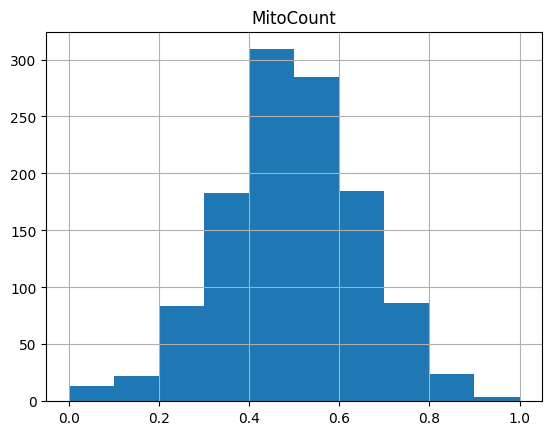

In [13]:
Vecmean[["MitoCount"]].hist()
plt.show()

In [14]:
## Convert to numeric
cols=Vecmean.columns[13:-4]
Vecmean[cols]=Vecmean[cols].astype(float)

In [15]:
Vecmean

,plate,well,Age,Sex,well_row,well_col,drug_id,concentration,Name,Pathway,...,Correlation_Mander1_ch1_ch3,Correlation_Mander2_ch1_ch3,Correlation_RWC2_ch1_ch3,Correlation_Slope_ch5_ch3,Correlation_Overlap_ch5_ch3,Correlation_Mander1_ch5_ch3,distance,coordX,coordY,cell_id
0,1,r03c03,56,Female,C,3,1,1.0,Y-39983 HCl,Cell Cycle,...,0.538688,0.335317,0.325238,0.679585,1.000000,0.404237,0.285319,0.394803,0.480197,0.241487
1,1,r03c04,56,Female,C,4,0,1.0,DMSO,0,...,0.532086,0.392421,0.622203,0.565749,0.145019,0.299342,0.362386,0.473232,0.378887,0.506613
2,1,r03c05,54,Female,C,5,1,1.0,Y-39983 HCl,Cell Cycle,...,0.556167,0.312987,0.358360,0.597168,0.564235,0.379477,0.351744,0.423029,0.449706,0.267073
3,1,r03c06,54,Female,C,6,0,1.0,DMSO,0,...,0.483463,0.404389,0.493152,0.499818,0.143305,0.323971,0.350383,0.432878,0.360900,0.504606
4,1,r03c07,54,Female,C,7,1,1.0,Y-39983 HCl,Cell Cycle,...,1.000000,0.352966,0.648346,0.775450,0.361214,0.211726,0.632104,0.238062,0.475414,0.237118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,5,r14c18,62,Male,N,18,3,1.0,Pemigatinib (INCB054828),Angiogenesis,...,0.472303,0.263775,0.385123,0.189175,0.170304,0.457144,0.451906,0.369041,0.259906,0.483237
1191,5,r14c19,71,Female,N,19,2,1.0,CP21R7 (CP21),Stem Cells & Wnt,...,0.574786,0.417153,0.546898,0.748174,0.317822,0.347650,0.502209,0.472564,0.272229,0.360279
1192,5,r14c20,71,Female,N,20,3,1.0,Pemigatinib (INCB054828),Angiogenesis,...,0.437731,0.241883,0.348697,0.265510,0.314024,0.090272,0.782937,0.455383,0.356232,0.220176
1193,5,r14c21,78,Female,N,21,2,1.0,CP21R7 (CP21),Stem Cells & Wnt,...,0.515398,0.290583,0.306093,0.563949,0.369525,0.344952,0.292077,0.392382,0.405261,0.626350


In [16]:
## Define metadata
cols_meta=['plate','well','Age','Sex','PD_status','well_row','well_col','drug_id','concentration',
 'Name','Pathway','drug','donor_id']

In [17]:
temp

NameError: name 'temp' is not defined

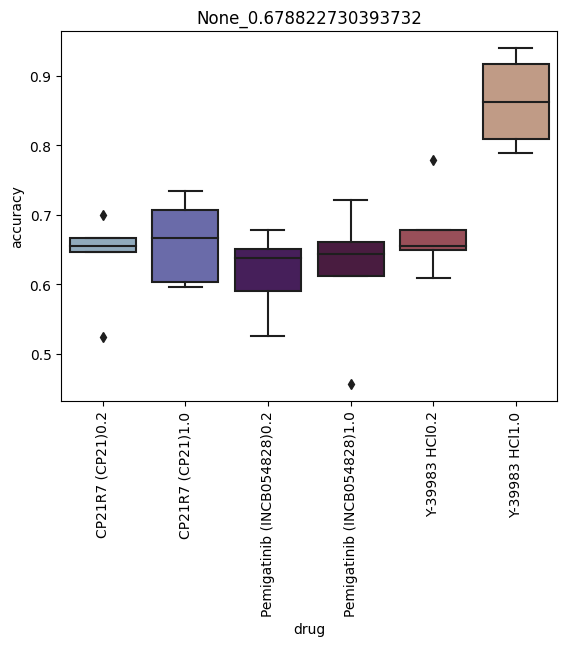

In [18]:
## Linear regression features sort

from sklearn.datasets import load_digits
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
norms=['plate','donor_id','ColPos','RowPos']
norms=[]
name='plateDonorColRow'
name="None"
columns=["MitoCount"]
Vecmean=Vecmean.fillna(0)
model = LinearRegression()


model.fit(Vecmean[columns], Vecmean.drug_id.values)

features_LR={}   
Results=pd.DataFrame(columns=['plate','drug','accuracy'])
for i in np.unique(Vecmean.drug):
    if i != 'StockDMSO':
   
        features_LR[i]=pd.DataFrame(columns=columns)
        temp=Vecmean.loc[Vecmean.drug==i]
        temp=pd.concat([temp,Vecmean.loc[Vecmean.drug=='StockDMSO']])
        temp['drug_id']=0
        temp.loc[temp.drug!='StockDMSO','drug_id']=1
        temp=temp.drop(temp.loc[temp.drug_id==0].sample(len(temp.loc[temp.drug_id==1])).index)
        
        for plate in np.unique(temp.plate):
            model.fit(temp.loc[temp.plate!=plate][columns], temp.loc[temp.plate!=plate].drug_id.values)
            features_LR[i].loc[plate]=model.coef_
            temp2=[plate,i,sklearn.metrics.accuracy_score(temp.loc[temp.plate==plate]['drug_id'],np.round(model.predict(temp.loc[temp.plate==plate][columns])))]
            Results=pd.concat([Results,pd.DataFrame(np.asarray(temp2).reshape(1,3),columns=['plate','drug','accuracy'])],axis=0)
            
Results['accuracy']=Results['accuracy'].astype(float)

sns.boxplot(data=Results,y='accuracy',x='drug',palette='twilight')
_=plt.xticks(rotation=90)

plt.title(name+'_'+str(np.mean(Results.accuracy)))
plt.show()



In [19]:
### Variance thresholding: removes the columns with low variance
from sklearn.feature_selection import VarianceThreshold

columns=cols
X = Vecmean[columns]
print(X.shape)
sel = VarianceThreshold()
X=sel.fit_transform(X)
print(X.shape)
cols_red=sel.get_feature_names_out()

(1195, 319)
(1195, 319)


In [31]:
## Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
preds_LR_fin={}

model={}
features={}
preds_LR_fin={}
cols_red= ["MitoCount"]
auc={}
best_nfeats=[1, 1, 1, 1, 1, 1]
for n,i in enumerate(np.unique(Vecmean.loc[Vecmean.drug!='StockDMSO'].drug)):
    

    
    if i != 'StockDMSO':
        model[i]={}
        preds_LR_fin[i]=pd.DataFrame()
       
        n_feat=np.asarray(best_nfeats)[n]
     
        temp=Vecmean.loc[Vecmean.drug==i]
        temp=pd.concat([temp,Vecmean.loc[Vecmean.drug=='StockDMSO']])
        temp['drug_id']=0
        temp.loc[temp.drug!='StockDMSO','drug_id']=1
    
        accuracy=[]
        auc[i]=[]
        lenF=[]
        features[i]=pd.DataFrame()
        for plate in np.unique(Vecmean.plate):
            clf = LogisticRegression(max_iter=10000,random_state=0)
            LR = LogisticRegression(max_iter=10000,random_state=0)
            
            drug=temp.loc[(temp.plate!=plate)&(temp.drug==i)]
            X_train=pd.concat([drug,temp.loc[(temp.plate!=plate)&(temp.drug=='StockDMSO')].sample(len(drug))])
            X_train=X_train
            y_train=X_train['drug_id']
            X_train=X_train[cols_red]

            X_test=temp.loc[temp.plate==plate][cols_red]
            y_test=temp.loc[temp.plate==plate]['drug_id']
            ##rfe = RFE(estimator=clf, n_features_to_select=n_feat)
          
            ##rfe.fit(X_train, y_train)
            ##mask = rfe.support_
            important_non_correlated_features=X_train.columns##[mask]

            lenF.append(len(important_non_correlated_features))
            X_test = X_test[important_non_correlated_features]
            LR.fit(X_train[important_non_correlated_features],y_train)
     
            model[i][plate]=LR
         
            features[i][plate]=important_non_correlated_features
            auc[i].append(sklearn.metrics.roc_auc_score(y_test,LR.predict(X_test[important_non_correlated_features])))
            accuracy.append(sklearn.metrics.accuracy_score(y_test,LR.predict(X_test[important_non_correlated_features])))

        t2=pd.DataFrame()
        t2.loc[n,'drug']=i
        t2.loc[n,'feat_parameter']=n_feat
        t2.loc[n,'final_parameter_n']=np.mean(lenF)
        t2.loc[n,'Accuracy']=np.mean(accuracy)
        t2.loc[n,'AUC']=np.mean(auc[i])
        preds_LR_fin[i]=pd.concat([preds_LR_fin[i],t2])
        print(preds_LR_fin[i])

               drug  feat_parameter  final_parameter_n  Accuracy   AUC
0  CP21R7 (CP21)0.2             1.0                1.0      0.64  0.65
               drug  feat_parameter  final_parameter_n  Accuracy       AUC
1  CP21R7 (CP21)1.0             1.0                1.0  0.677778  0.681667
                          drug  feat_parameter  final_parameter_n  Accuracy  \
2  Pemigatinib (INCB054828)0.2             1.0                1.0  0.633333   

    AUC  
2  0.63  
                          drug  feat_parameter  final_parameter_n  Accuracy  \
3  Pemigatinib (INCB054828)1.0             1.0                1.0  0.637778   

        AUC  
3  0.641667  
             drug  feat_parameter  final_parameter_n  Accuracy       AUC
4  Y-39983 HCl0.2             1.0                1.0  0.673583  0.670345
             drug  feat_parameter  final_parameter_n  Accuracy       AUC
5  Y-39983 HCl1.0             1.0                1.0   0.84794  0.841609


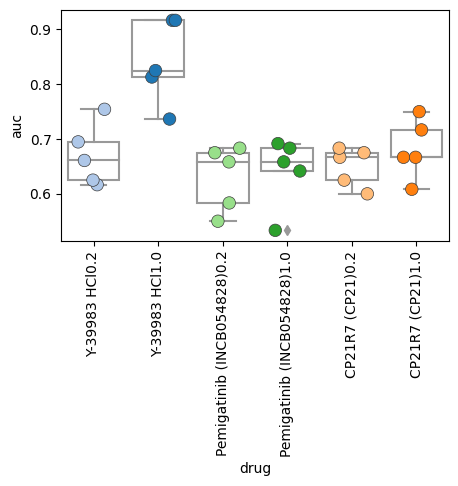

In [32]:
## Plot the results
results_for_plot=pd.DataFrame()
pal=['#aec7e8','#1f77b4','#98df8a','#2ca02c', '#ffbb78' ,'#ff7f0e']
for i in auc.keys():
    temp=pd.DataFrame()
    temp['auc']=auc[i]
    temp['drug']=i
    results_for_plot=pd.concat([results_for_plot,temp],axis=0)
plt.subplots(figsize=(5,3))
sns.boxplot(data=results_for_plot,y='auc',x='drug',color='white',order=['Y-39983 HCl0.2','Y-39983 HCl1.0','Pemigatinib (INCB054828)0.2','Pemigatinib (INCB054828)1.0','CP21R7 (CP21)0.2','CP21R7 (CP21)1.0'])
sns.stripplot(data=results_for_plot,y='auc',x='drug',s=9,jitter=0.3,linewidth=0.5,palette=pal,order=['Y-39983 HCl0.2','Y-39983 HCl1.0','Pemigatinib (INCB054828)0.2','Pemigatinib (INCB054828)1.0','CP21R7 (CP21)0.2','CP21R7 (CP21)1.0'])
_=plt.xticks(rotation=90)
plt.show()

In [33]:
results_for_plot

,auc,drug
0,0.666667,CP21R7 (CP21)0.2
1,0.675000,CP21R7 (CP21)0.2
2,0.683333,CP21R7 (CP21)0.2
3,0.600000,CP21R7 (CP21)0.2
4,0.625000,CP21R7 (CP21)0.2
0,0.716667,CP21R7 (CP21)1.0
1,0.750000,CP21R7 (CP21)1.0
2,0.608333,CP21R7 (CP21)1.0
3,0.666667,CP21R7 (CP21)1.0
4,0.666667,CP21R7 (CP21)1.0


In [23]:
### Add channel features    
def add_channel_features(feat):
    ''' 
    Returns the channels of the features taken as the input
    '''
    ch=[]
    for n in range(1,6):
        if 'ch'+str(n) in feat:
            ch.append(['ER','Mito','AGP','DNA','RNA'][n-1])
    if 'Mito' in feat:
        ch.append('Mito')
    if 'RNA' in feat:
        ch.append('RNA')
    if len(ch)==0:
        ch.append('None')
    return ch


MitoCount
Y-39983 HCl0.2 True


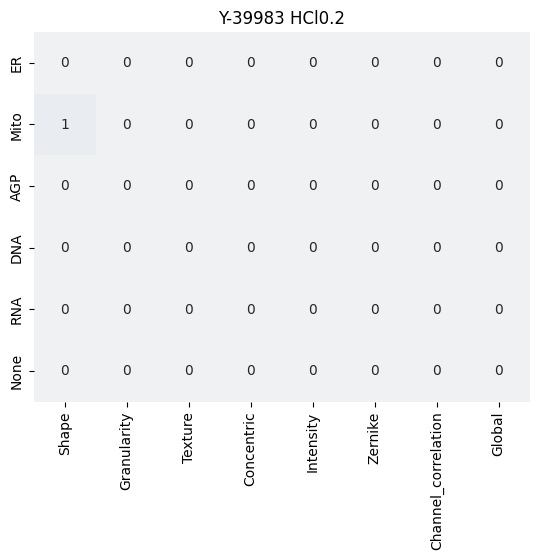

MitoCount
Y-39983 HCl1.0 True


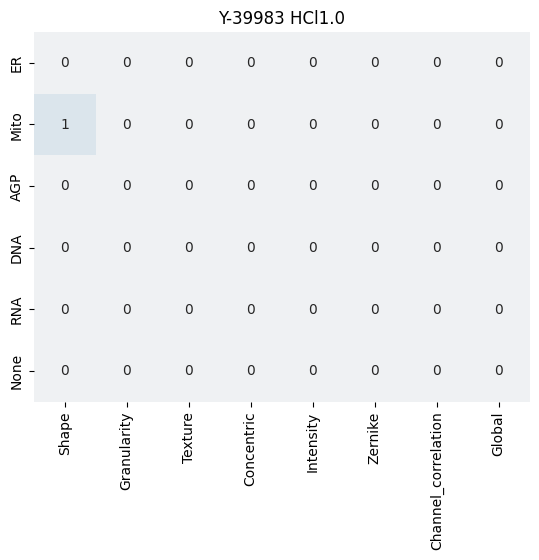

MitoCount
CP21R7 (CP21)0.2 True


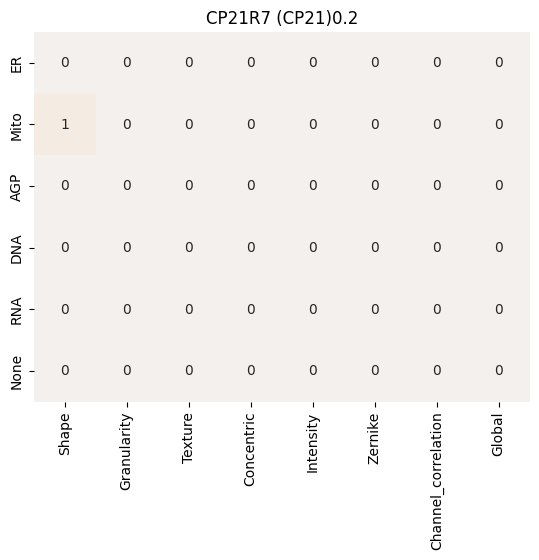

MitoCount
CP21R7 (CP21)1.0 True


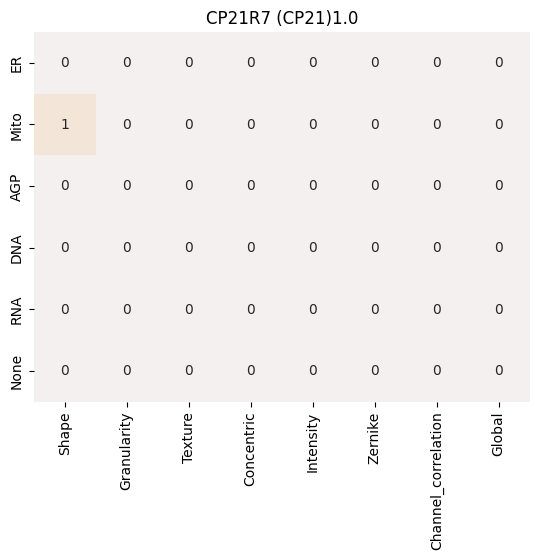

MitoCount
Pemigatinib (INCB054828)0.2 True


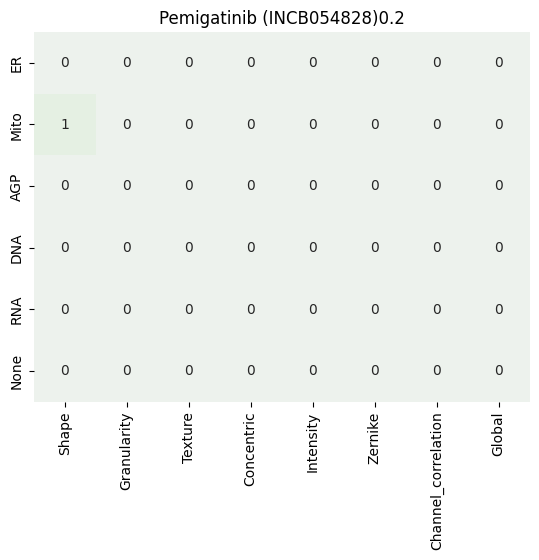

MitoCount
Pemigatinib (INCB054828)1.0 True


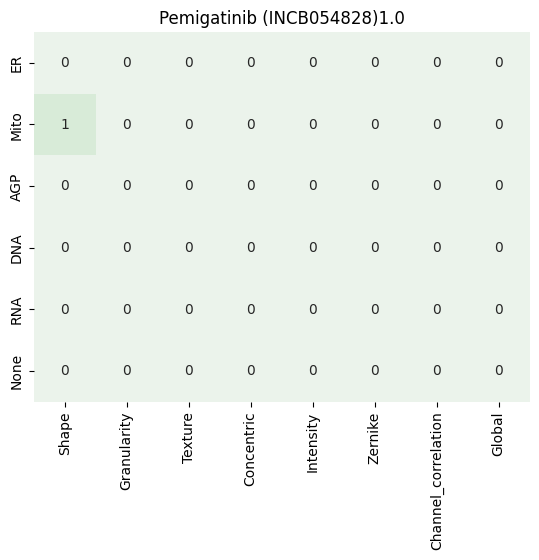

In [24]:
### remove correlated features after putting the 5 CVs together
pale=sns.color_palette("twilight",7).as_hex()
tot_features_summary={}
pale=['#aec7e8','#1f77b4', '#ffbb78', '#ff7f0e',  '#98df8a', '#2ca02c']
for n,i in enumerate([ 'Y-39983 HCl0.2', 'Y-39983 HCl1.0','CP21R7 (CP21)0.2', 'CP21R7 (CP21)1.0',
       'Pemigatinib (INCB054828)0.2', 'Pemigatinib (INCB054828)1.0']):
    if i!='StockDMSO':
        a=pd.DataFrame()
        f=0
     
        for f,key in enumerate(model[i].keys()):
            if f==0:

                a['features']=model[i][key].feature_names_in_
                a['coefficient_Plate1']=model[i][key].coef_[0]


            else:
                a['coefficient_Plate'+str(f+1)]=0
                for feat in model[i][key].feature_names_in_:


                    if feat in list(a.features.values):

                        a.loc[a.features==feat,'coefficient_Plate'+str(f+1)]=model[i][key].coef_[0][np.where(feat==model[i][key].feature_names_in_)[0]][0]
                    else:
          
                        temp=np.zeros((1,f+2)).astype(object)
                        temp[0][0]=feat
                        temp[0][f+1]=model[i][key].coef_[0][np.where(feat==model[i][key].feature_names_in_)[0]][0]
                        a=pd.concat([a,pd.DataFrame(temp,columns=a.columns,index=[a.index[-1]+1])])

        a['sum_of_coefficients']=abs(a.iloc[:,1:]).sum(axis=1)
        a['total_counts']=(a.iloc[:,1:-1]!=0.0).sum(axis=1)   
        
        a=a[a.features.isin(X_train.columns)]
        
        tot_features_summary[i]=a
        feat_bar=pd.DataFrame(0,columns=['Shape','Granularity','Texture','Concentric','Intensity','Zernike','Channel_correlation','Global'],index=['ER','Mito','AGP','DNA','RNA','None'])
        
        for ff in a.loc[a.total_counts==5].features:
            b=[]
            print(ff)
            if ("intensity" in ff) or ("Int" in ff):
                 b.append('Intensity')

            if ("Solidity" in ff) or ('Perimeter' in ff) or ('hape' in ff) or ("Eccentricity" in ff) or ('RNA' in ff) or ('Mito' in ff):
                 b.append('Shape')

            if ('Granularity' in ff):
                 b.append('Granularity')

            if ("ext" in ff) :
                 b.append('Texture')
            if ("ernike" in ff) :
                 b.append('Zernike')

            if ('Conc' in ff) :
                 b.append('Concentric')
            if ('Mander' in ff) or ('Slope' in ff) or ('Overlap' in ff) or ('RWC' in ff) or ('Correlation_c' in ff):
                b.append('Channel_correlation')
            if len(b)==0:
       
                b.append('Global')

            for c in add_channel_features(ff):
                for bb in b:
                    feat_bar.loc[c,bb]+=1/(len(b)+len(add_channel_features(ff))-1)

        print(i,len(a.loc[a.total_counts==5].features)==feat_bar.sum().sum())
        cmap=sns.light_palette(pale[n], as_cmap=True)


        sns.heatmap(feat_bar,annot=True,vmax=10,cmap=cmap,cbar=False)
        #
        plt.title(i)
        plt.show()


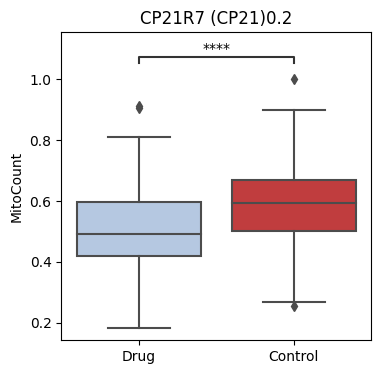

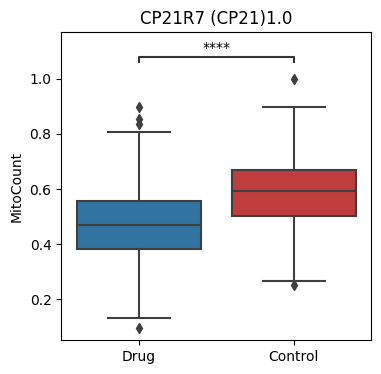

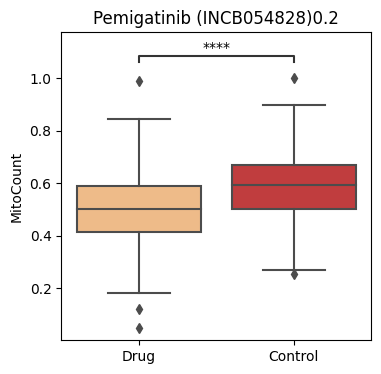

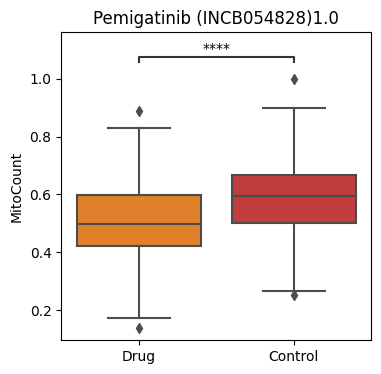

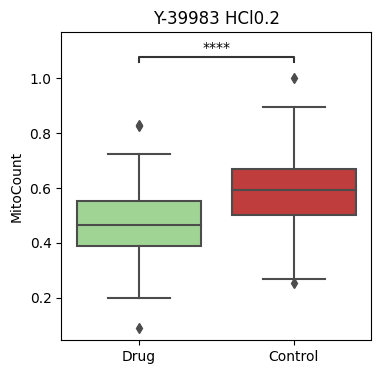

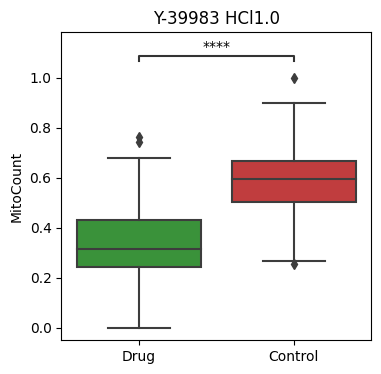

In [25]:
# Print the best scoring features

pale=sns.color_palette("twilight",7).as_hex()
pale=['#aec7e8','#1f77b4', '#ffbb78', '#ff7f0e',  '#98df8a', '#2ca02c']
from statannot import add_stat_annotation

for r,i in enumerate(np.unique(Vecmean.loc[Vecmean.drug!='StockDMSO'].drug)):

    temp=Vecmean.loc[Vecmean.drug==i]
    temp=pd.concat([temp,Vecmean.loc[Vecmean.drug=='StockDMSO']],axis=0)
    temp2=tot_features_summary[i].loc[tot_features_summary[i].total_counts==5]
    temp2=temp2.sort_values(by='sum_of_coefficients',ascending=False)
    color=['#aec7e8','#1f77b4', '#ffbb78', '#ff7f0e',  '#98df8a', '#2ca02c'][r]

    for f in temp2.features[:1]:
        
        
        plt.subplots(figsize=(4,4))
        g=sns.boxplot(data=temp,y=f,x='drug',palette=[color,'#d62728'])
        add_stat_annotation(g, data=temp, x='drug',y=f, order=[i,'StockDMSO'],
                box_pairs=[(i,'StockDMSO')],
                test='Mann-Whitney', text_format='star',  verbose=0)
        plt.title(i)
        plt.xticks([0,1],['Drug','Control'])
        plt.xlabel('')
        plt.show()
         
           


In [26]:
# print the best features per drug and concentration
i='Pemigatinib (INCB054828)1.0'
best_features=tot_features_summary[i].loc[tot_features_summary[i].total_counts==5]
best_features=best_features.sort_values(by='sum_of_coefficients',ascending=False)
best_features

,features,coefficient_Plate1,coefficient_Plate2,coefficient_Plate3,coefficient_Plate4,coefficient_Plate5,sum_of_coefficients,total_counts
0,MitoCount,-2.268384,-2.935919,-2.01359,-2.22407,-2.619114,12.061077,5
